In [0]:
# Based on https://docs.sympy.org/latest/tutorial/preliminaries.html
from sympy import *
from sympy.plotting import *
import sympy
import os
from sympy import *
from sympy.geometry import *

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)

if 'HOME' in os.environ:
    if 'Windows' in os.environ['OS']:
        print('Windows detected')
    else:
        # Google Colab Latex printing setup
        init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

# """ DIVISION IMPORTANT NOTE
# In divisions of python numbers(integers) 
# use Rational function to get exact results
# >>> Rational(1,2)  # = 1/2 """
# EXACT result use evalf => sqrt(8).evalf(5) = 2.8284
# """ GRAPHVIZ ON SYMPY
# from sympy.printing.dot import dotprint
# from graphviz import Source
# dot = Source(dotprint(x**2))
# dot
# """
# srepr(function)
x, y, z, t = symbols('x y z t')


In [0]:

"""
Utility functions for plotting sympy functions.
See examples\mplot2d.py and examples\mplot3d.py for usable 2d and 3d
graphing functions using matplotlib.
"""
from matplotlib import cm
from sympy.core.sympify import sympify, SympifyError
from sympy.external import import_module
np = import_module('numpy')

def sample2d(f, x_args):
    """
    Samples a 2d function f over specified intervals and returns two
    arrays (X, Y) suitable for plotting with matlab (matplotlib)
    syntax. See examples\mplot2d.py.
    f is a function of one variable, such as x**2.
    x_args is an interval given in the form (var, min, max, n)
    """
    try:
        f = sympify(f)
    except SympifyError:
        raise ValueError("f could not be interpretted as a SymPy function")
    try:
        x, x_min, x_max, x_n = x_args
    except (TypeError, IndexError):
        raise ValueError("x_args must be a tuple of the form (var, min, max, n)")

    x_l = float(x_max - x_min)
    x_d = x_l/float(x_n)
    X = np.arange(float(x_min), float(x_max) + x_d, x_d)

    Y = np.empty(len(X))
    for i in range(len(X)):
        try:
            Y[i] = float(f.subs(x, X[i]))
        except TypeError:
            Y[i] = None
    return X, Y


def sample3d(f, x_args, y_args):
    """
    Samples a 3d function f over specified intervals and returns three
    2d arrays (X, Y, Z) suitable for plotting with matlab (matplotlib)
    syntax. See examples\mplot3d.py.
    f is a function of two variables, such as x**2 + y**2.
    x_args and y_args are intervals given in the form (var, min, max, n)
    """
    x, x_min, x_max, x_n = None, None, None, None
    y, y_min, y_max, y_n = None, None, None, None
    try:
        f = sympify(f)
    except SympifyError:
        raise ValueError("f could not be interpreted as a SymPy function")
    try:
        x, x_min, x_max, x_n = x_args
        y, y_min, y_max, y_n = y_args
    except (TypeError, IndexError):
        raise ValueError("x_args and y_args must be tuples of the form (var, min, max, intervals)")

    x_l = float(x_max - x_min)
    x_d = x_l/float(x_n)
    x_a = np.arange(float(x_min), float(x_max) + x_d, x_d)

    y_l = float(y_max - y_min)
    y_d = y_l/float(y_n)
    y_a = np.arange(float(y_min), float(y_max) + y_d, y_d)

    def meshgrid(x, y):
        """
        Taken from matplotlib.mlab.meshgrid.
        """
        x = np.array(x)
        y = np.array(y)
        numRows, numCols = len(y), len(x)
        x.shape = 1, numCols
        X = np.repeat(x, numRows, 0)

        y.shape = numRows, 1
        Y = np.repeat(y, numCols, 1)
        return X, Y

    X, Y = np.meshgrid(x_a, y_a)

    Z = np.ndarray((len(X), len(X[0])))
    for j in range(len(X)):
        for k in range(len(X[0])):
            try:
                Z[j][k] = float(f.subs(x, X[j][k]).subs(y, Y[j][k]))
            except (TypeError, NotImplementedError):
                Z[j][k] = 0
    return X, Y, Z


def sample(f, *var_args):
    """
    Samples a 2d or 3d function over specified intervals and returns
    a dataset suitable for plotting with matlab (matplotlib) syntax.
    Wrapper for sample2d and sample3d.
    f is a function of one or two variables, such as x**2.
    var_args are intervals for each variable given in the form (var, min, max, n)
    """
    if len(var_args) == 1:
        return sample2d(f, var_args[0])
    elif len(var_args) == 2:
        return sample3d(f, var_args[0], var_args[1])
    else:
        raise ValueError("Only 2d and 3d sampling are supported at this time.")

import sys

from sympy import sin, Symbol
from sympy.external import import_module


def mplot3d(f, var1, var2, show=True):
    """
    Plot a 3d function using matplotlib/Tk.
    """

    import warnings
    warnings.filterwarnings("ignore", "Could not match \S")

    p = import_module('pylab')
    # Try newer version first
    p3 = import_module('mpl_toolkits.mplot3d',
        __import__kwargs={'fromlist': ['something']}) or import_module('matplotlib.axes3d')
    if not p or not p3:
        sys.exit("Matplotlib is required to use mplot3d.")

    x, y, z = sample(f, var1, var2)

    fig = p.figure()
    ax = p3.Axes3D(fig)

    ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.coolwarm)
    #ax.plot_wireframe(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    if show:
        p.show()

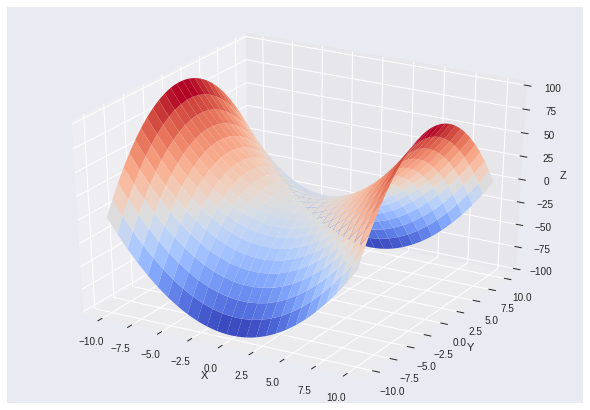

In [19]:
x = Symbol('x')
y = Symbol('y')

mplot3d(x**2 - y**2, (x, -10.0, 10.0, 50), (y, -10.0, 10.0, 50))